In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read the image and convert it to GRAYSCALE

img = cv2.imread('/Users/rafiansari/Library/CloudStorage/OneDrive-Personal/CST4090 - Thesis/Signature Verification Using Visual Analytics/Code+Files/genuine/1.jpg')
img = cv2.resize(img, (750, 500))


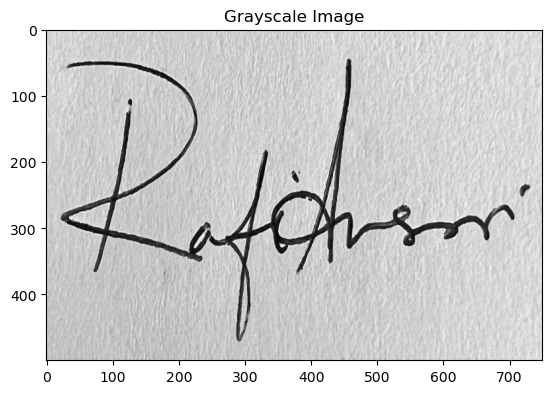

In [5]:
# Display the grayscale image using Matplotlib
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()


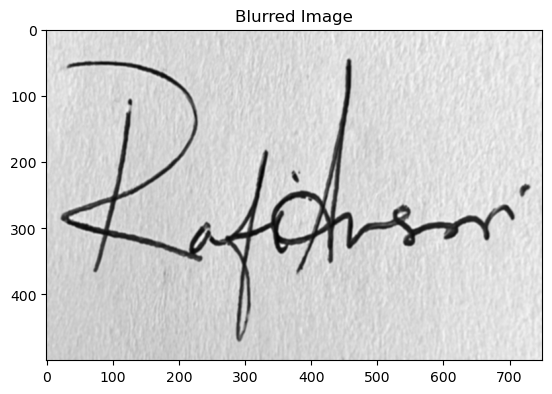

In [6]:
# Applying Gaussian Blur to reduce noise 
img_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Display the blur image using Matplotlib
plt.imshow(img_blur, cmap='gray')
plt.title('Blurred Image')
plt.show()

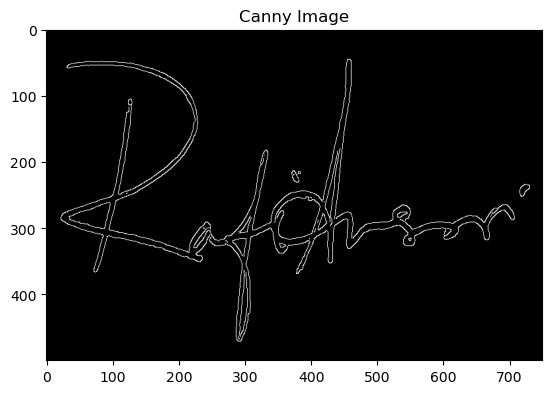

In [7]:
# Applying Canny Edge Detection to detect edges
edges = cv2.Canny(img_blur, 50, 200)

# Display the Canny image using Matplotlib
plt.imshow(edges, cmap='gray')
plt.title('Canny Image')
plt.show()

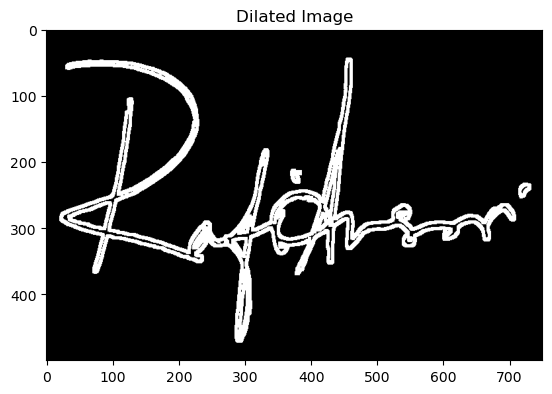

In [8]:
# Applying Dilation to thicken the edges
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(edges, kernel, iterations = 1)

# Display the dilated image using Matplotlib
plt.imshow(dilation, cmap='gray')
plt.title('Dilated Image')
plt.show()

In [9]:
ret, thresh = cv2.threshold(dilation, 127, 255, cv2.THRESH_BINARY) # Applying threshold to create a binary image


In [10]:
# Applying HoughCircle to detect circles in image
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=1, minDist=100,
                           param1=50, param2=30, minRadius=0, maxRadius=0)


In [11]:
# Drawing the detected circles on the image

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)


In [12]:
# Apply HoughLines to detect lines in the image

lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

In [13]:
# Drawing the detected lines on the image

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1, y1), (x2, y2), tuple(map(int, (0, 0, 255))), 2)

In [14]:
# Finding contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [15]:
# Drawing the contours on the image 
cv2.drawContours(img, contours, -1, (255, 0, 0), 0)

array([[[203, 201, 190],
        [209, 207, 196],
        [215, 213, 202],
        ...,
        [219, 222, 213],
        [215, 218, 209],
        [212, 215, 206]],

       [[201, 200, 189],
        [213, 211, 200],
        [221, 219, 208],
        ...,
        [217, 220, 211],
        [216, 220, 211],
        [220, 223, 215]],

       [[201, 199, 188],
        [217, 215, 204],
        [224, 222, 211],
        ...,
        [212, 215, 206],
        [214, 217, 208],
        [227, 230, 221]],

       ...,

       [[202, 196, 183],
        [206, 200, 187],
        [206, 200, 187],
        ...,
        [226, 229, 220],
        [224, 226, 217],
        [224, 228, 218]],

       [[203, 197, 184],
        [203, 197, 184],
        [205, 199, 186],
        ...,
        [222, 225, 216],
        [215, 218, 209],
        [217, 220, 211]],

       [[203, 197, 184],
        [201, 195, 182],
        [203, 197, 185],
        ...,
        [212, 215, 206],
        [206, 209, 200],
        [212, 215, 206]]

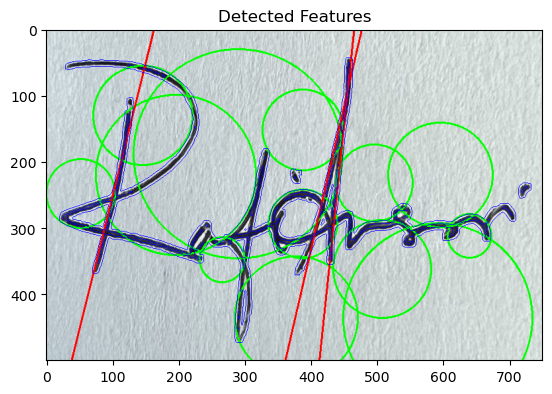

In [16]:
# Displaying the final image

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected Features')
plt.show()


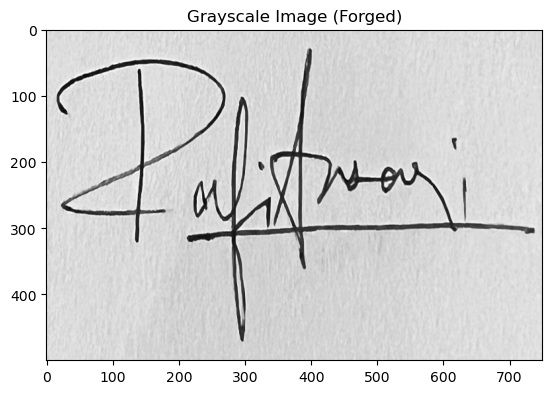

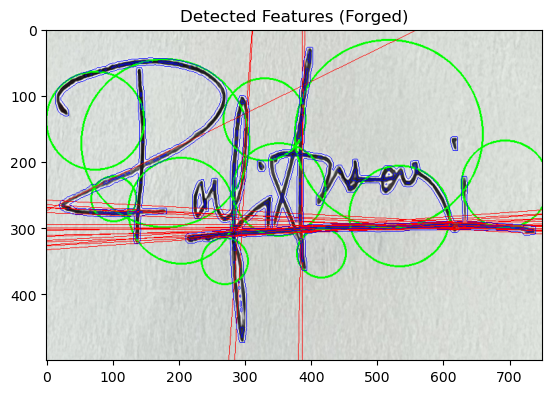

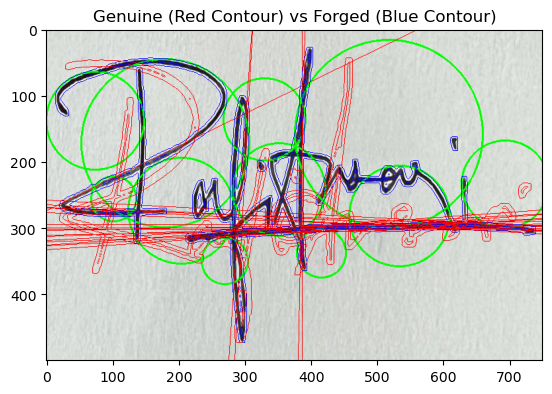

In [17]:
# Read the image and convert it to GRAYSCALE

img_forged = cv2.imread('/Users/rafiansari/Library/CloudStorage/OneDrive-Personal/CST4090 - Thesis/Signature Verification Using Visual Analytics/Code+Files/forged/20.jpg')
img_forged = cv2.resize(img_forged, (750, 500))


# Display the grayscale image using Matplotlib

gray_forged = cv2.cvtColor(img_forged, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_forged, cmap='gray')
plt.title('Grayscale Image (Forged)')
plt.show()

# Applying Gaussian Blur to reduce noise 

img_blur_forged = cv2.GaussianBlur(gray_forged, (5, 5), 0)

# Applying Canny Edge Detection to detect edges

edges_forged = cv2.Canny(img_blur_forged, 50, 200)

# Applying Dilation to thicken the edges

kernel = np.ones((5,5), np.uint8)
dilation_forged = cv2.dilate(edges_forged, kernel, iterations = 1)

ret_forged, thresh_forged = cv2.threshold(dilation_forged, 127, 255, cv2.THRESH_BINARY) # Applying threshold to create a binary image

# Applying HoughCircle to detect circles in image

circles_forged = cv2.HoughCircles(thresh_forged, cv2.HOUGH_GRADIENT, dp=1, minDist=100,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Drawing the detected circles on the image

if circles_forged is not None:
    circles_forged = np.round(circles_forged[0, :]).astype("int")
    for (x, y, r) in circles_forged:
        cv2.circle(img_forged, (x, y), r, (0, 255, 0), 2)

# Apply HoughLines to detect lines in the image

lines_forged = cv2.HoughLines(edges_forged, 1, np.pi/180, 100)

# Drawing the detected lines on the image

if lines_forged is not None:
    for line in lines_forged:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img_forged, (x1, y1), (x2, y2), tuple(map(int, (0, 0, 255))), 1)

# Finding contours in the binary image

contours_forged, hierarchy_forged = cv2.findContours(thresh_forged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Drawing the contours on the image 

cv2.drawContours(img_forged, contours_forged, -1, (255, 0, 0), 0)

# Displaying the final image

plt.imshow(cv2.cvtColor(img_forged, cv2.COLOR_BGR2RGB))
plt.title('Detected Features (Forged)')
plt.show()

# Drawing the contours on the image 

img_forged_copy = img_forged.copy()
cv2.drawContours(img_forged_copy, contours, -1, (0, 0, 255), 1)

# Displaying the final image

plt.imshow(cv2.cvtColor(img_forged_copy, cv2.COLOR_BGR2RGB))
plt.title('Genuine (Red Contour) vs Forged (Blue Contour)')
plt.show()



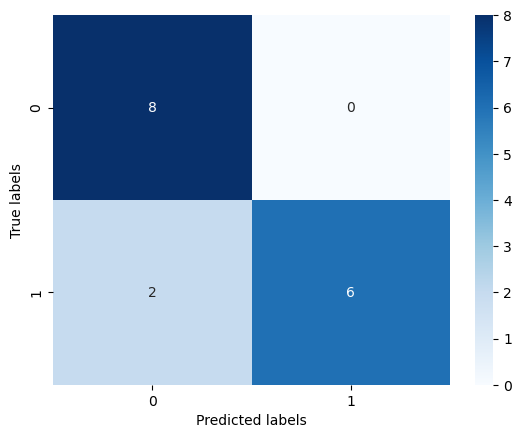

Accuracy Score: 87.50%
Precision Score: 100.00%
Recall Score: 75.00%
F1 Score: 85.71%


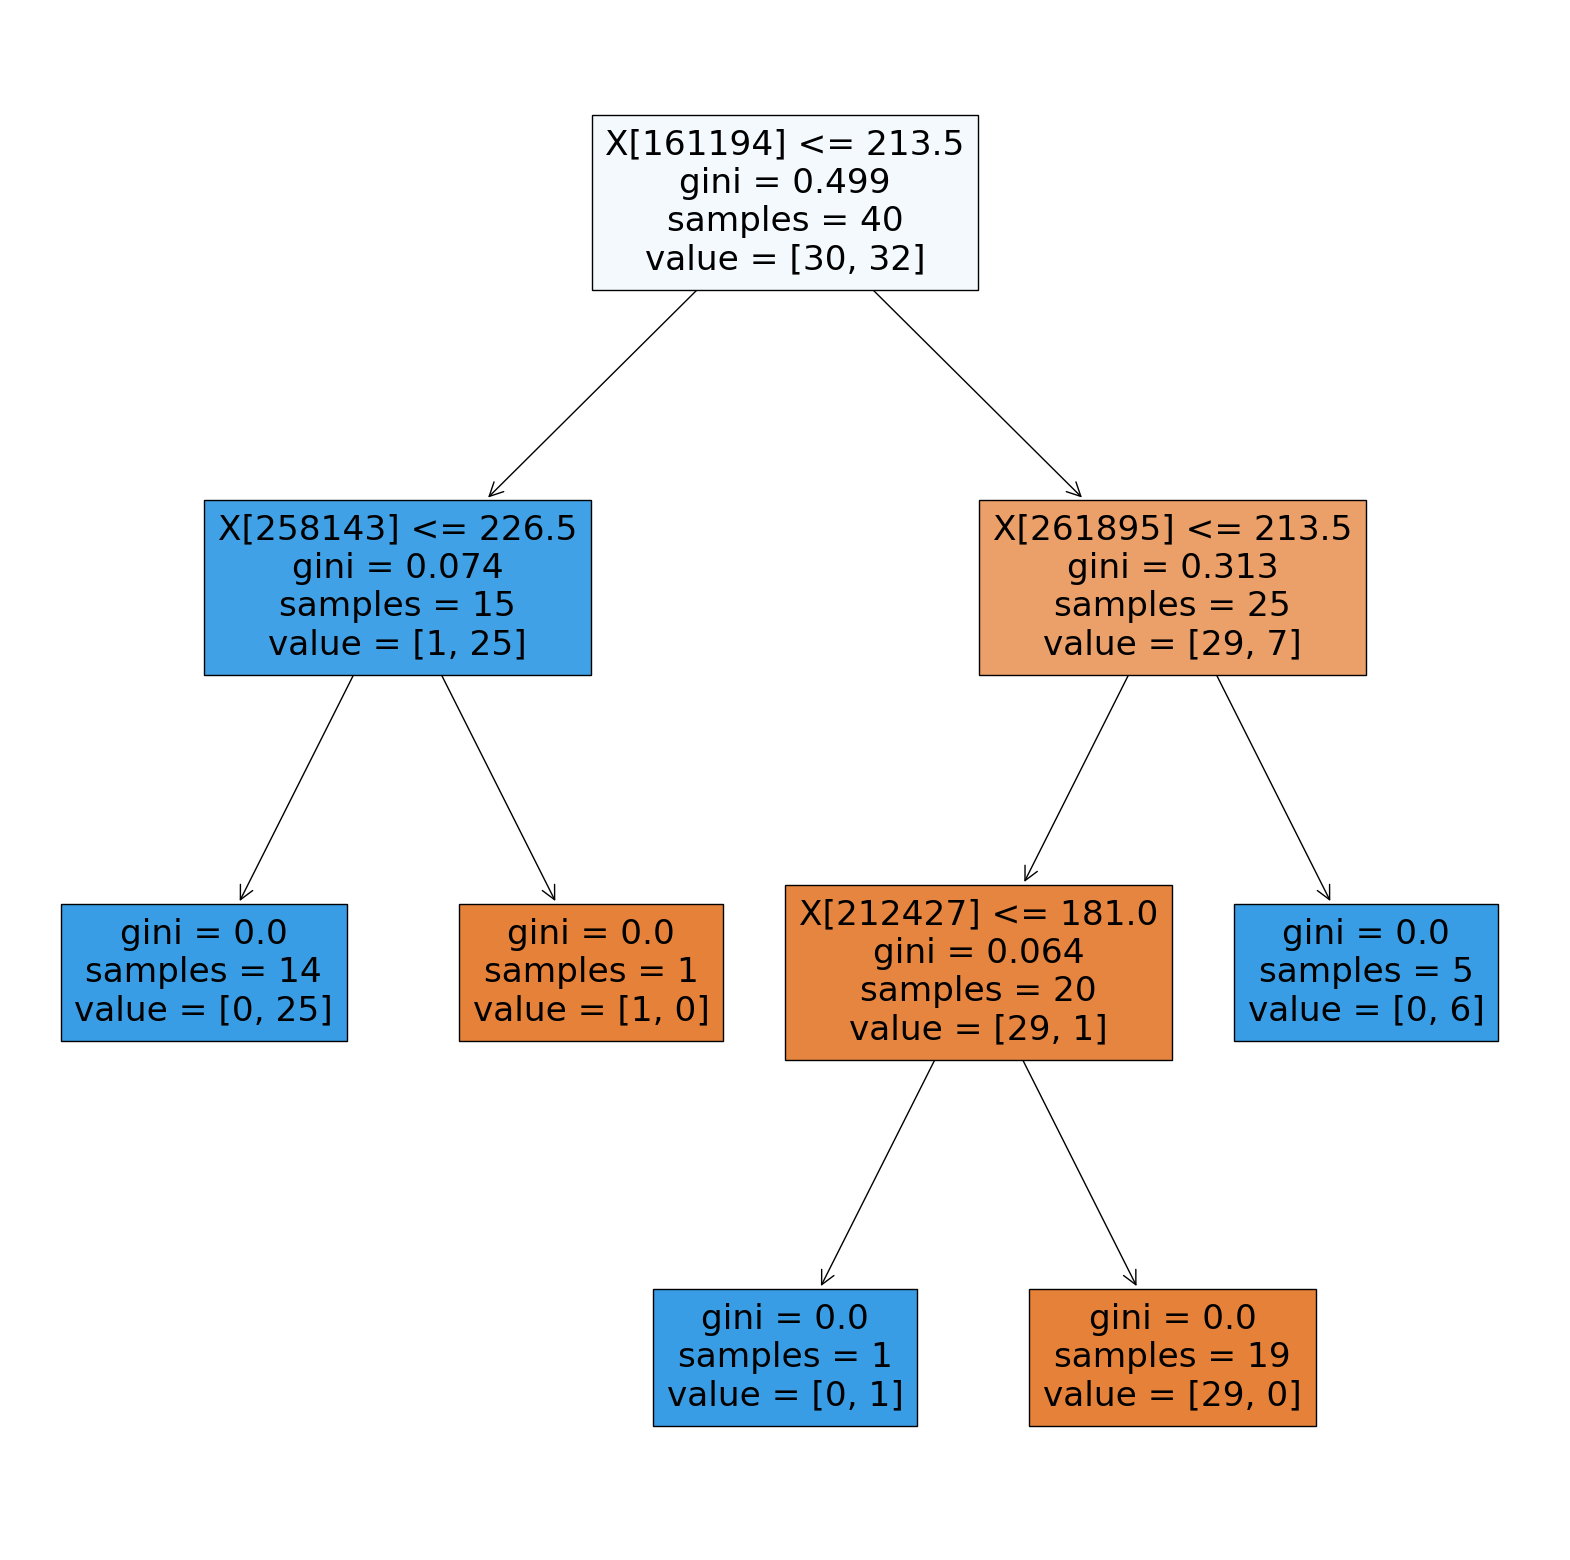

In [21]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Read genuine signatures
X = []
y = []
# Read genuine images
genuine_dir = '/Users/rafiansari/Library/CloudStorage/OneDrive-Personal/CST4090 - Thesis/Signature Verification Using Visual Analytics/Code+Files/genuine'
for file in os.listdir(genuine_dir):
    if file.endswith('.jpg'):
        img_path = os.path.join(genuine_dir, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (750, 500))
            X.append(img.flatten())
            y.append(0)

# Read forged images
forged_dir = '/Users/rafiansari/Library/CloudStorage/OneDrive-Personal/CST4090 - Thesis/Signature Verification Using Visual Analytics/Code+Files/forged'
for file in os.listdir(forged_dir):
    if file.endswith('.jpg'):
        img_path = os.path.join(forged_dir, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (750, 500))
            X.append(img.flatten())
            y.append(1)

# Split data into training and testing sets
X = np.array(X)
y = np.array(y)
np.random.seed(42)
shuffle_indices = np.random.permutation(np.arange(len(y)))
X = X[shuffle_indices]
y = y[shuffle_indices]
split_idx = int(len(y)*0.8)
X_train = X[:split_idx]
y_train = y[:split_idx]
X_test = X[split_idx:]
y_test = y[split_idx:]

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results

import seaborn as sns

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()
print("Accuracy Score:", "{:.2f}%".format(accuracy*100))
print("Precision Score:", "{:.2f}%".format(precision*100))
print("Recall Score:", "{:.2f}%".format(recall*100))
print("F1 Score:", "{:.2f}%".format(f1*100))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot first tree of the Random Forest
plt.figure(figsize=(20,20))
plot_tree(rf.estimators_[0], filled=True)
plt.show()



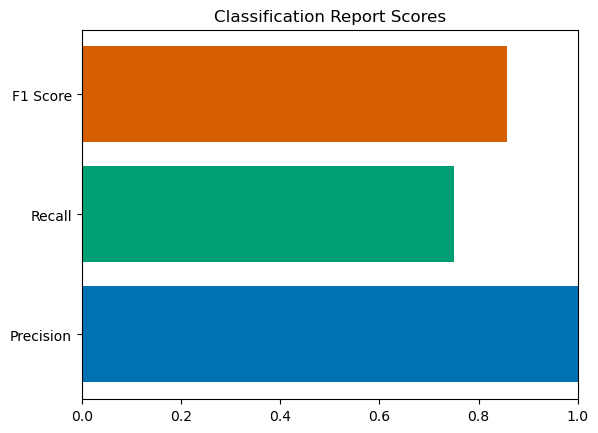

In [19]:
import matplotlib.pyplot as plt

# Plot precision, recall, and F1 scores as horizontal bar chart
scores = [precision, recall, f1]
colors = ["#0072B2", "#009E73", "#D55E00"]
labels = ["Precision", "Recall", "F1 Score"]
plt.barh(labels, scores, color=colors)
plt.xlim(0, 1)
plt.title("Classification Report Scores")
plt.show()

